In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats import (
    preprocess,
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_player_stats,
    print_segments,
    get_month_df,
    get_goal,
    plot_month_df,
)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 2.csv")

orig_df.head()

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Yellows Tees,2022-06-18 10:56,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Yellows Tees,2022-06-18 10:56,55,-3.0,3,3,2,3,3,3,3,4,4,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Par,Loriella Park,White Tees to Yellow Baskets,2022-06-17 16:53,59,NaN,3,3,3,4,4,3,3,4,3,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Monkey,Loriella Park,White Tees to Yellow Baskets,2022-06-17 16:53,66,7.0,2,4,2,4,4,3,3,5,4,4.0,3.0,3.0,5.0,3.0,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Par,Bryan Park,Paver Tees,2022-06-15 17:25,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = preprocess(orig_df)

df.head()

2020-11-05 17:22:00


,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellows Tees,2022-06-18 10:56:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022
1,Monkey,Bryan Park,Yellows Tees,2022-06-18 10:56:00,55,-3.0,3,3,2,3,3,3,3,4,4,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2022
2,Par,Loriella Park,White Tees to Yellow Baskets,2022-06-17 16:53:00,59,NaN,3,3,3,4,4,3,3,4,3,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Tees to Yellow Baskets,2022
3,Monkey,Loriella Park,White Tees to Yellow Baskets,2022-06-17 16:53:00,66,7.0,2,4,2,4,4,3,3,5,4,4.0,3.0,3.0,5.0,3.0,4.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White Tees to Yellow Baskets,2022
4,Par,Bryan Park,Paver Tees,2022-06-15 17:25:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paver Tees,2022


In [4]:
print_segments(df)

Players: ['Par', 'Monkey', 'Bryan Der', 'Sam Forsyth', 'Riley', 'Scott', 'James M.', 'Noah', 'Austin', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Loriella Park', 'Dunncroft - Castle Point Park', 'Dorey Park', 'Gillies Creek Park', "Bird's Ruins DGC", 'THE Diavolo DGC @ New Hope Park', 'University Of Richmond', 'Bluemont Park', 'Elver Park']
Layouts: ['Yellows Tees', 'White Tees to Yellow Baskets', 'Paver Tees', 'Shorts then Longs', 'White - Short Tees', 'Main', 'Red - Short Tees', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Diavolo White', 'Chainbangers’ 18', 'Short tees Red baskets', 'Front 9 ']


In [5]:
get_goal(df)

Score: 21.0


In [6]:
course="Bryan Park"
# course="Dunncroft - Castle Point Park"

layout="Yellows Tees"
# layout="Paver Tees"
# layout = "Shorts then Longs"

min_date="2020-01"
# min_date="2021-01"
# min_date="2022-01"

Yearly Stats for Monkey at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
28,Monkey,Bryan Park,Yellows Tees,2020,76.272727,18.272727,3.545455,4.090909,4.000000,4.727273,3.909091,3.727273,3.545455,5.181818,4.727273,4.090909,6.181818,3.818182,3.818182,5.000000,3.727273,4.090909,4.909091,3.181818
29,Monkey,Bryan Park,Yellows Tees,2021,62.240506,4.240506,2.898734,3.253165,3.189873,4.139241,3.139241,3.075949,3.025316,3.936709,3.949367,3.569620,5.063291,3.164557,3.253165,3.443038,2.987342,3.202532,4.139241,2.810127
30,Monkey,Bryan Park,Yellows Tees,2022,58.700000,0.700000,2.925000,3.000000,3.075000,3.900000,2.975000,2.900000,2.750000,3.800000,3.575000,3.400000,4.800000,2.875000,3.250000,3.300000,3.000000,2.925000,3.475000,2.775000


/Users/justin/github/udisc_stats/udisc_stats.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


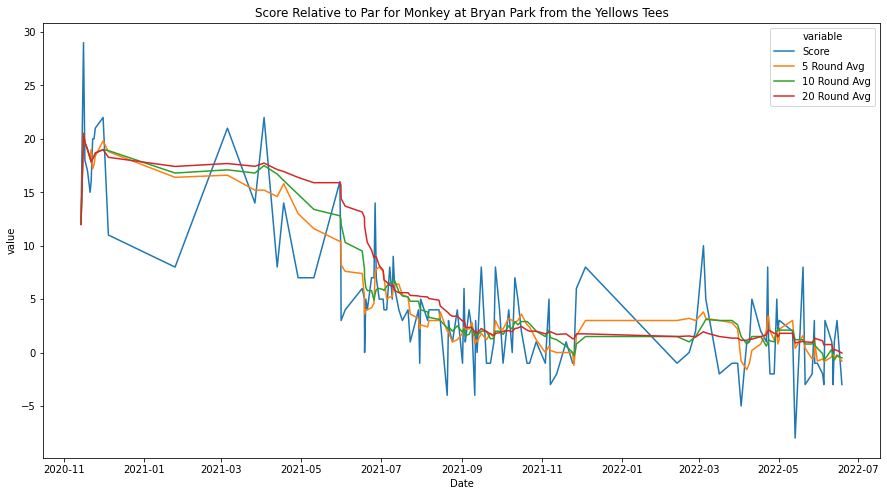

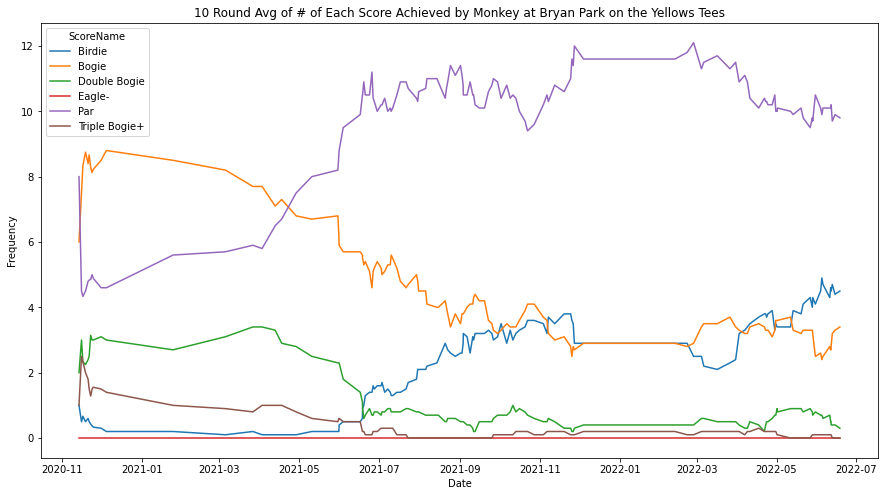

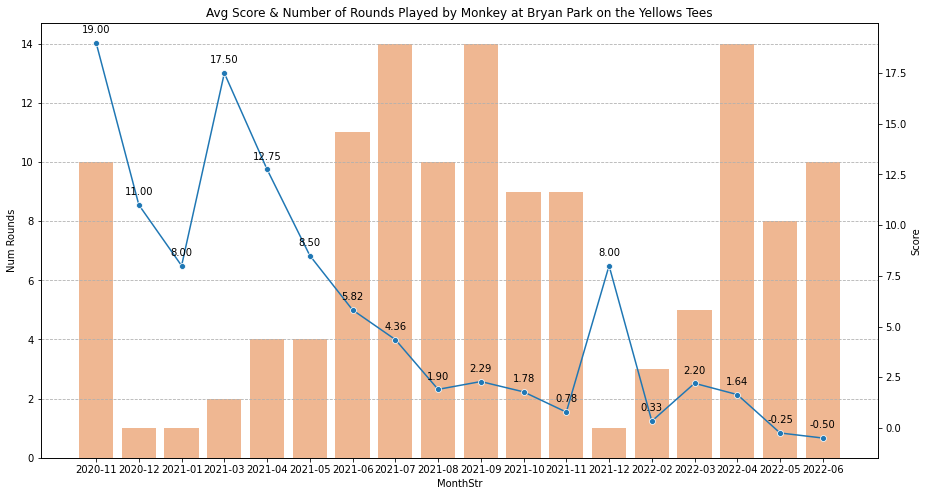

In [7]:
get_player_stats(
    df=df,
    player="Monkey",
    course=course,
    layout=layout,
    min_date=min_date,
)

Yearly Stats for Bryan Der at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
3,Bryan Der,Bryan Park,Yellows Tees,2021,67.720000,9.720000,3.360000,3.840000,3.600000,4.720000,3.2,3.24,3.120000,4.400000,4.280000,4.080000,5.680000,3.320000,3.36,4.120000,3.200000,2.600000,4.32,3.280000
4,Bryan Der,Bryan Park,Yellows Tees,2022,64.916667,6.916667,3.083333,3.666667,3.833333,4.583333,3.0,3.25,2.916667,4.333333,3.916667,3.833333,5.666667,2.916667,3.25,3.583333,3.083333,2.833333,4.00,3.166667


/Users/justin/github/udisc_stats/udisc_stats.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


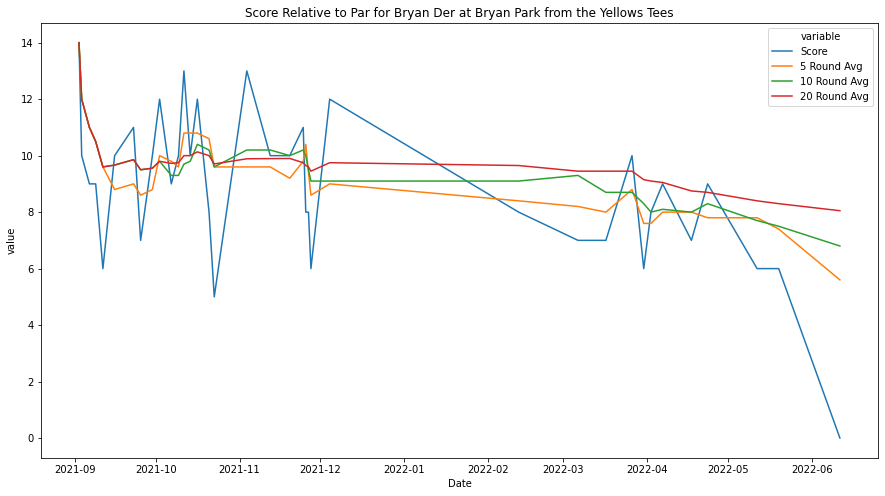

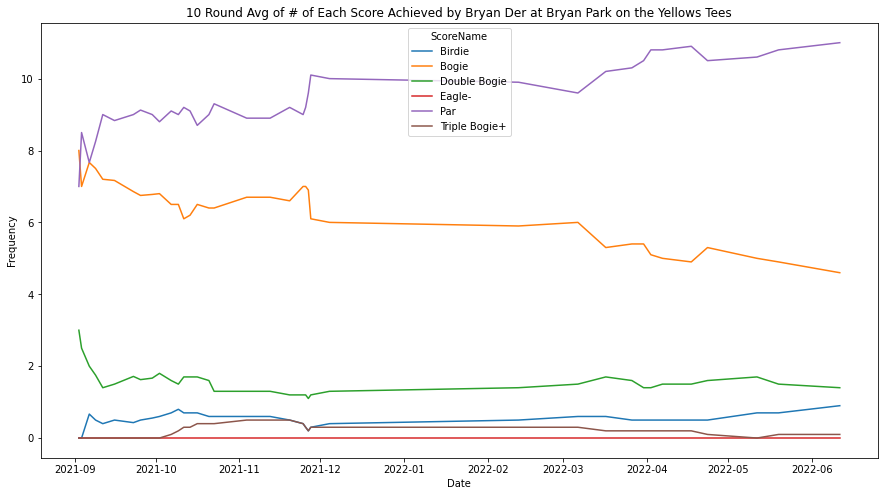

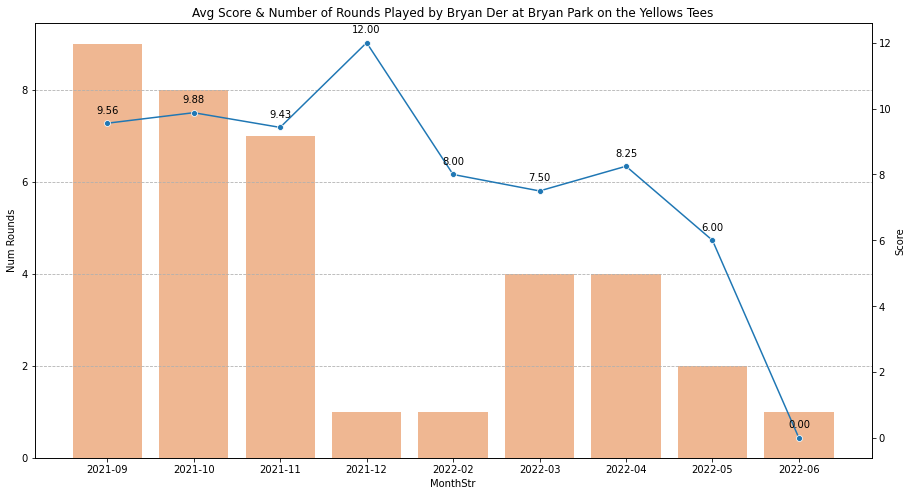

In [8]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course=course,
    layout=layout,
    min_date=min_date,
)

Yearly Stats for Riley at Bryan Park from the Yellows Tees


,PlayerName,CourseName,LayoutNameAdj,Year,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18
78,Riley,Bryan Park,Yellows Tees,2021,77.250000,19.250000,4.000000,4.000000,4.000000,5.000000,4.00,4.000000,3.500000,4.500000,4.50,4.000000,6.250000,4.250000,4.250000,4.25,4.250000,3.250000,5.750000,3.500000
79,Riley,Bryan Park,Yellows Tees,2022,69.833333,11.833333,3.416667,3.416667,3.833333,4.916667,3.75,3.833333,3.583333,4.083333,4.25,4.166667,5.416667,3.916667,3.333333,3.75,3.333333,3.333333,4.666667,2.833333


/Users/justin/github/udisc_stats/udisc_stats.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df["MonthStr"] = viz_df["Month"].dt.strftime("%Y-%m")


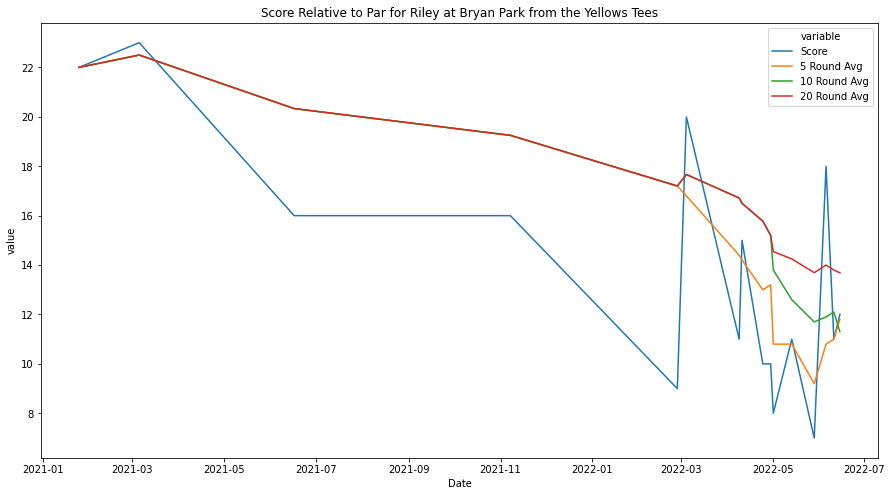

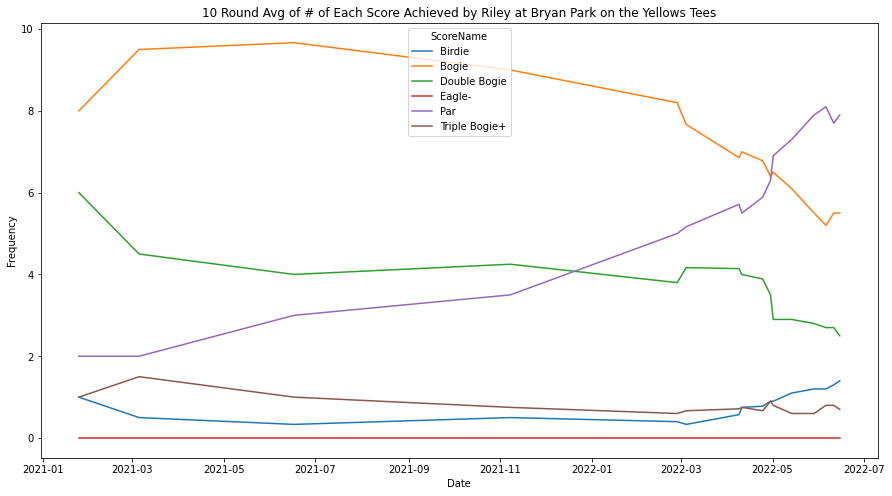

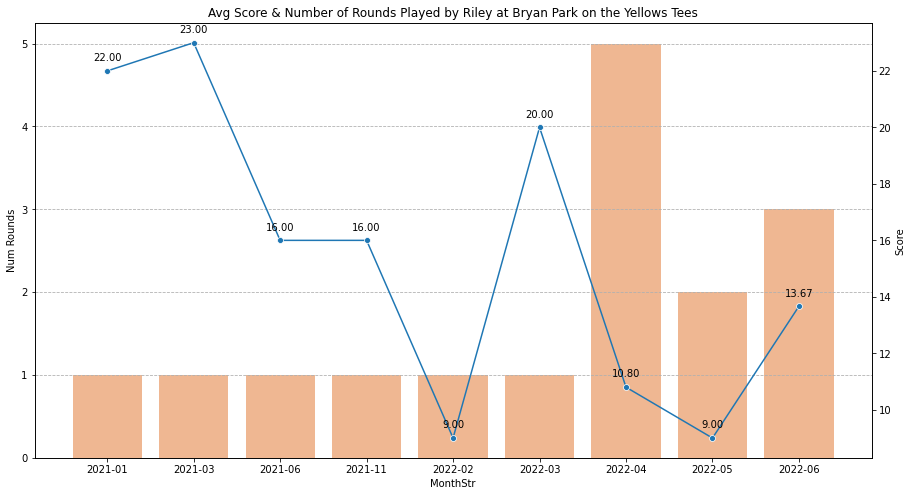

In [9]:
get_player_stats(
    df=df,
    player="Riley",
    course=course,
    layout=layout,
    min_date=min_date,
)